[Data](https://nuwe.io/challenge/data-science-cb)

#Installation of the required libraries

## Install conda for Colab (First play only this)

In [1]:
'''
Not Required
!pip install -q condacolab
import condacolab
condacolab.install()
'''

'\nNot Required\n!pip install -q condacolab\nimport condacolab\ncondacolab.install()\n'

In [2]:
'''
import condacolab
condacolab.check()
'''

'\nimport condacolab\ncondacolab.check()\n'

## Install required repositories for the neural net ( Second you can run everything bellow )

In [3]:
'''
Not Required
!apt-get install -y axel imagemagick
#!conda install pytorch=0.4.1 torchvision cuda91 -y -c pytorch
!conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch
!conda install -y -c anaconda pip
!conda install -y -c anaconda pyyaml
#!pip install tensorboard tensorboardX
'''

'\nNot Required\n!apt-get install -y axel imagemagick\n#!conda install pytorch=0.4.1 torchvision cuda91 -y -c pytorch\n!conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch\n!conda install -y -c anaconda pip\n!conda install -y -c anaconda pyyaml\n#!pip install tensorboard tensorboardX\n'

In [4]:
#!conda install -c pytorch pytorch cuda100

## Test everything is working well

In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
!nvidia-smi

Sat May 28 16:04:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Copy my github repository

In [7]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [8]:
!git clone https://github.com/SergiPonsa/Caixa-Nuwe-28-05.git

fatal: destination path 'Caixa-Nuwe-28-05' already exists and is not an empty directory.


In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

# Git pull and visualize data in git

In [10]:
%cd /content/Caixa-Nuwe-28-05/
!pwd

/content/Caixa-Nuwe-28-05
/content/Caixa-Nuwe-28-05


In [11]:
!git pull

Already up to date.


In [12]:
!ls

Caixa-Nuwe-28-05  README.md   train.csv
model.pkl	  test_x.csv  tweets_from2015_#Ibex35.csv


# Program predict ibex from ibex data set

## 0 - Required imports and functions definitions

### 0.1 Functions definitions

In [13]:
# loockBack = 20 number of data in each batch
def prepare_batches (x_data, y_data = None, loockBack = 10):
  x_batch = []
  y_batch = []
  for index in range(len(x_data) - loockBack):
    x_batch.append(x_data[index: index + loockBack])
    if not y_data is None:
      y_batch.append(y_data[index: index + loockBack])

  x_batch = np.array(x_batch)
  if not y_data is None:
    y_batch = np.array(y_batch)
    return x_batch,y_batch
  else:
    return x_batch,None

### 0.2 Imports

In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import time

## 1 - Read the Ibex data, analyse, clean and prepare data

### 1.1 Read the data

In [15]:
train_df = pd.read_csv('train.csv')
test_x_df = pd.read_csv('test_x.csv')

### 1.2 Analyse and clean the data

I check If the data is complete

In [16]:
print(test_x_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_index  726 non-null    int64  
 1   Date        726 non-null    object 
 2   Open        726 non-null    float64
 3   High        726 non-null    float64
 4   Low         726 non-null    float64
 5   Close       726 non-null    float64
 6   Adj Close   726 non-null    float64
 7   Volume      726 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.5+ KB
None


In [17]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB
None


The data is not complete but only 100 values, I can delete them and I am not losing to much information

In [18]:
train_df = train_df.dropna()
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6421 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6421 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6421 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 451.5+ KB
None


I visualize the data to be able to understand better the data

In [19]:
print(train_df.head())

         Date         Open         High          Low        Close  \
0  1994-01-03  3615.199951  3654.699951  3581.000000  3654.500000   
1  1994-01-04  3654.500000  3675.500000  3625.100098  3630.300049   
2  1994-01-05  3625.199951  3625.199951  3583.399902  3621.199951   
4  1994-01-07  3621.199951  3644.399902  3598.699951  3636.399902   
5  1994-01-10  3655.199951  3678.199951  3655.199951  3660.600098   

     Adj Close  Volume  Target  
0  3654.496338     0.0       0  
1  3630.296387     0.0       1  
2  3621.196289     0.0       1  
4  3636.396240     0.0       1  
5  3660.596436     0.0       1  


In [20]:
print(train_df.describe())

               Open          High           Low         Close     Adj Close  \
count   6421.000000   6421.000000   6421.000000   6421.000000   6421.000000   
mean    8936.540448   9005.235576   8858.340567   8934.978558   8934.970624   
std     2732.102441   2749.009324   2712.511028   2731.032625   2731.030170   
min     2865.100098   2877.300049   2833.600098   2865.100098   2865.097168   
25%     7732.399902   7817.200195   7641.500000   7727.799805   7727.791992   
50%     9329.700195   9404.599609   9243.000000   9331.000000   9331.000000   
75%    10525.500000  10590.299805  10441.200195  10523.400391  10523.400391   
max    15999.200195  16040.400391  15868.599609  15945.700195  15945.683594   

             Volume       Target  
count  6.421000e+03  6421.000000  
mean   8.218074e+07     0.527644  
std    1.231845e+08     0.499274  
min    0.000000e+00     0.000000  
25%    0.000000e+00     0.000000  
50%    1.966000e+05     1.000000  
75%    1.773980e+08     1.000000  
max    7

I check the correlations

In [21]:
print(train_df['Target'].corr(train_df['Adj Close']))
print(train_df['Target'].corr(train_df['Open']))
print(train_df['Target'].corr(train_df['High']))
print(train_df['Target'].corr(train_df['Low']))
print(train_df['Target'].corr(train_df['Close']))
print(train_df['Target'].corr(train_df['Volume']))

-0.017413997649211612
-0.017777092372831756
-0.017758741226730563
-0.01765471331507807
-0.01741399386196035
0.0003054249426972032


In [22]:
print(train_df['Open'].corr(train_df['Adj Close']))
print(train_df['Open'].corr(train_df['Close']))
print(train_df['Open'].corr(train_df['High']))
print(train_df['Open'].corr(train_df['Low']))
print(train_df['Open'].corr(train_df['Volume']))

0.9991869125864032
0.9991869122480536
0.9996620595980537
0.9995332248169949
0.13415866925589653


From all the data it seems that all is really correlated so they will not add to many information, except the Volume.
But the volume is little related to the Target.

I am going to keep only the 'Open' data which is sligthly more correlated to the output and the volume which is not correlated to the other and Close to try to get a bit more of information.

In [23]:
train_df = train_df.drop(columns=['Adj Close','High','Low'])

The volume also seems that some years was always 0, probably because it was not mesured

In [24]:
volume0_df = train_df.loc[train_df['Volume']== 0.0]
#volume0_df.head(360) # 1 years
#volume0_df.head(720) # 2 years
volume0_df.head(1440) # 4 years
volume0_df.head(1440) # 4 years

,Date,Open,Close,Volume,Target
0,1994-01-03,3615.199951,3654.500000,0.0,0
1,1994-01-04,3654.500000,3630.300049,0.0,1
2,1994-01-05,3625.199951,3621.199951,0.0,1
4,1994-01-07,3621.199951,3636.399902,0.0,1
5,1994-01-10,3655.199951,3660.600098,0.0,1
...,...,...,...,...,...
1499,1999-10-01,9525.400391,9482.799805,0.0,1
1500,1999-10-04,9482.799805,9601.000000,0.0,1
1501,1999-10-05,9601.000000,9656.299805,0.0,1
1502,1999-10-06,9644.700195,9624.700195,0.0,1


In [25]:
print(volume0_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 4950
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1649 non-null   object 
 1   Open    1649 non-null   float64
 2   Close   1649 non-null   float64
 3   Volume  1649 non-null   float64
 4   Target  1649 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 77.3+ KB
None


It seems my hypothesis is true so I will delete the elements with volume 0

In [26]:
train_df = train_df.loc[train_df['Volume']!= 0.0]

In [27]:
print(train_df.head())

            Date          Open         Close     Volume  Target
1710  2000-07-24  10879.599609  10831.500000  5545600.0       0
1711  2000-07-25  10831.500000  10714.599609  7368000.0       0
1712  2000-07-26  10722.599609  10743.799805  6643800.0       0
1713  2000-07-27  10743.799805  10726.000000  6989400.0       0
1714  2000-07-28  10726.000000  10560.000000  6670000.0       1


### 1.3 Prepare Scalers

To avoid that the units can affect to the effect of an specific feature I scale al between 0 and 1.


In [28]:
scalerPrice = MinMaxScaler(feature_range=(0,1))
scalerVolume = MinMaxScaler(feature_range=(0,1))

In [29]:
price = train_df['Open'].values.reshape(-1, 1)
scalerPrice.fit(price)
volume = train_df['Volume'].values.reshape(-1, 1)
scalerVolume.fit(volume)

MinMaxScaler()

### 1.4 Prepare Train Data

#### 1.4.1 Put everything in the same reference

In [30]:
columns_to_not_scale = ['Date','Target']
columns_to_scale_with_volume = ['Volume']

for column in list(train_df.keys()):
  if column in columns_to_not_scale:
    continue
  if column in columns_to_scale_with_volume:
    train_df[column] = scalerVolume.transform(train_df[column].values.reshape(-1, 1))
  else:
    train_df[column] = scalerPrice.transform(train_df[column].values.reshape(-1, 1))

In [31]:
print(train_df.head())

            Date      Open     Close    Volume  Target
1710  2000-07-24  0.521729  0.517236  0.006977       0
1711  2000-07-25  0.517236  0.506315  0.009285       0
1712  2000-07-26  0.507062  0.509043  0.008368       0
1713  2000-07-27  0.509043  0.507380  0.008806       0
1714  2000-07-28  0.507380  0.491873  0.008401       1


In [32]:
print(train_df.describe())

              Open        Close       Volume       Target
count  4772.000000  4772.000000  4772.000000  4772.000000
mean      0.417468     0.417154     0.140023     0.524728
std       0.190009     0.190073     0.166504     0.499441
min       0.000000     0.006511     0.000000     0.000000
25%       0.287230     0.286651     0.000156     0.000000
50%       0.403428     0.402848     0.009801     1.000000
75%       0.509592     0.509709     0.271288     1.000000
max       1.000000     0.995002     1.000000     1.000000


#### 1.4.2 Get data in the desired net format

In [33]:
x_df = train_df.drop(columns = ['Target','Date'])
x_data = x_df.values
y_data = train_df['Target'].values

Create the batches

In [34]:
x, y = prepare_batches (x_data, y_data)

In [35]:
print(x.shape)
print(y.shape)

(4762, 10, 3)
(4762, 10)


In [36]:
n_data = x.shape[0]
x_one_train = 0.7
n_data_train = int(np.floor(n_data * x_one_train))
print('n_data_train',n_data_train)
x_train = x[:n_data_train,:,:]
y_train = y[:n_data_train,:]
x_val = x[n_data_train::,:,:]
y_val = y_data[n_data_train+10:]

n_data_train 3333


In [37]:
print(x_train.shape)
print(y_train.shape)

(3333, 10, 3)
(3333, 10)


In [38]:
print(x_val.shape)
print(y_val.shape)

(1429, 10, 3)
(1429,)


Convert to Tensors

In [39]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
x_val = torch.from_numpy(x_val).type(torch.Tensor)

### 1.5 Prepare Test Data

#### 1.5.1 Put everything in the same reference

In [40]:
columns_to_not_scale = ['Date','Target','test_index']
columns_to_scale_with_volume = ['Volume']

for column in list(test_x_df.keys()):
  if column in columns_to_not_scale:
    continue
  if column in columns_to_scale_with_volume:
    test_x_df[column] = scalerVolume.transform(test_x_df[column].values.reshape(-1, 1))
  else:
    test_x_df[column] = scalerPrice.transform(test_x_df[column].values.reshape(-1, 1))

In [41]:
print(test_x_df.head())

   test_index        Date      Open      High       Low     Close  Adj Close  \
0        6557  2019-06-05  0.358918  0.362337  0.355013  0.360198   0.360198   
1        6558  2019-06-06  0.361945  0.369138  0.358909  0.361945   0.361945   
2        6559  2019-06-07  0.363579  0.370558  0.363486  0.368194   0.368194   
3        6560  2019-06-10  0.372688  0.374369  0.369315  0.373613   0.373613   
4        6561  2019-06-11  0.373099  0.377200  0.371679  0.372492   0.372492   

     Volume  
0  0.201045  
1  0.269406  
2  0.190799  
3  0.129566  
4  0.183245  


In [42]:
print(test_x_df.describe())

        test_index        Open        High         Low       Close  \
count   726.000000  726.000000  726.000000  726.000000  726.000000   
mean   6919.500000    0.290080    0.295508    0.283749    0.289721   
std     209.722436    0.084015    0.082832    0.085657    0.084388   
min    6557.000000    0.086777    0.099744    0.048550    0.075894   
25%    6738.250000    0.238582    0.249344    0.230571    0.239423   
50%    6919.500000    0.315679    0.320471    0.309681    0.315534   
75%    7100.750000    0.353387    0.357743    0.346243    0.353366   
max    7282.000000    0.444107    0.448918    0.441491    0.447367   

        Adj Close      Volume  
count  726.000000  726.000000  
mean     0.289721    0.264235  
std      0.084388    0.128671  
min      0.075894    0.044839  
25%      0.239423    0.186497  
50%      0.315534    0.231436  
75%      0.353366    0.296481  
max      0.447367    1.235254  


#### 1.5.2 Get data in the desired net format

In [43]:
x_test_df = test_x_df.drop(columns = ['Adj Close','High','Low','test_index','Date'])
x_test_data = x_test_df.values

Create the batches

In [44]:
x_test, _ = prepare_batches (x_test_data)

In [45]:
print(x_test.shape)

(716, 10, 3)


Convert to Tensors

In [46]:
x_test = torch.from_numpy(x_test).type(torch.Tensor)

## 2 - Create the Neural Net

I will use a Long Short-Term Memory net to predict considering the previous values (LSTM)

I define the structure

In [47]:
input_dim = 3 # Open, close and Volume
hidden_dim = 32
num_layers = 2
output_dim = 1

I define a class for the LSTM neural net

In [48]:
class My_LSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
    super(My_LSTM,self).__init__()
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers

    # Object of the pythorch class LSTM
    # Data will be provided as a batch
    self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

    # addition of a fully connected linear layer to the end
    self.fc = nn.Linear(hidden_dim,output_dim)
            
    
  def forward(self,x):
    ''' Process when a tensor is introduced'''

    #Creation 2 tensors of 0, with the size of the input data and the number of layers
    # with the flag requires_grad or detach() to avoid a copy
    # This tensors have the cell states and the hidden states
    # cell state - memory of the network (start with no memory)
    # hidden state - output at the previous point (start with previous state 0)
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

    # provide the batch of data, the initial hidden state and the initial cell state
    # to the LSTM net
    out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

    #Connect the output of the LSTM to the fully connected linear
    out = self.fc(out[:, -1, :])

    return out



I create the net and define the loss function which will be used and the optimiser used to iteratively reduce the loss.

In [49]:
model = My_LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# I use as loss function the Mean Square error.
# The loss function will be, the sum of the output, divided by the number of elements in the output
criterion = torch.nn.MSELoss(reduction='mean')

# The optimiser use will be ADAM with a learning rate of 0.05
optimiser = torch.optim.Adam(model.parameters(), lr=0.0025)

## 3 Train the neural Net


In [50]:
num_epochs = 1000

In [51]:
hist = np.zeros(num_epochs)
start_time = time.time()
times = []
for t in range (num_epochs):
  y_train_pred = model(x_train)
  loss = criterion(y_train_pred,y_train)
  #print("Epoch ", t, "MSE: ", loss.item(),end="\r",flush=True)
  print("Epoch ", t, "MSE: ", loss.item())
  hist[t] = loss.item()

  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  times.append(time.time()-start_time)

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([3333, 10])) that is different to the input size (torch.Size([3333, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  0 MSE:  0.8378267288208008
Epoch  1 MSE:  0.7697059512138367
Epoch  2 MSE:  0.7069297432899475
Epoch  3 MSE:  0.6470879316329956
Epoch  4 MSE:  0.5889090299606323
Epoch  5 MSE:  0.5313461422920227
Epoch  6 MSE:  0.47370392084121704
Epoch  7 MSE:  0.41590210795402527
Epoch  8 MSE:  0.35900670289993286
Epoch  9 MSE:  0.30642855167388916
Epoch  10 MSE:  0.26582881808280945
Epoch  11 MSE:  0.25068607926368713
Epoch  12 MSE:  0.27270805835723877
Epoch  13 MSE:  0.30507028102874756
Epoch  14 MSE:  0.3130077123641968
Epoch  15 MSE:  0.29952654242515564
Epoch  16 MSE:  0.2788260579109192
Epoch  17 MSE:  0.26154109835624695
Epoch  18 MSE:  0.25198379158973694
Epoch  19 MSE:  0.24969446659088135
Epoch  20 MSE:  0.2521005868911743
Epoch  21 MSE:  0.2564948797225952
Epoch  22 MSE:  0.26088976860046387
Epoch  23 MSE:  0.2641317546367645
Epoch  24 MSE:  0.265727698802948
Epoch  25 MSE:  0.2656303346157074
Epoch  26 MSE:  0.2640722393989563
Epoch  27 MSE:  0.26145315170288086
Epoch  28 MSE:  0

In [62]:
print(len(times))
print(len(hist))

1000
1000


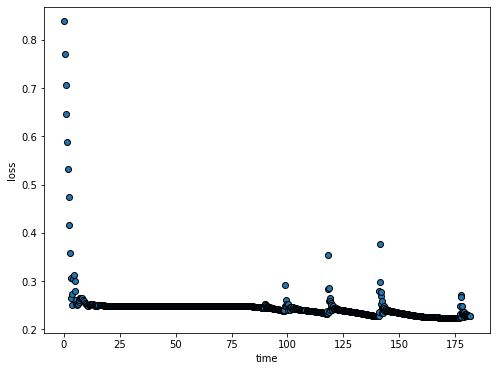

In [63]:
fig2 = plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(times, hist, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("time")
plt.ylabel("loss")
fig2.show()

In [64]:
torch.save(model, 'model.pkl')

In [65]:
model2 = torch.load('model.pkl')

## 4 Validate

In [66]:
y_pred = model.forward(x_val)
y_pred = y_pred.detach().numpy()

In [67]:
threshold = 0.5
y_pred = y_pred>threshold
y_pred = y_pred.reshape(y_pred.shape[0])

In [68]:
print(y_pred.shape)

(1429,)


In [69]:
print(y_val.shape)

(1429,)


In [70]:
print(metrics.f1_score(y_val,y_pred))

0.5163826998689384


In [71]:
print(metrics.confusion_matrix(y_val,y_pred))

[[297 394]
 [344 394]]


## 5 Test and create the test csv

In [72]:
y_test = model.forward(x_test)
y_test = y_test.detach().numpy()

In [74]:
threshold = 0.5
y_test = y_test>threshold
y_test = y_test.reshape(y_test.shape[0])

In [75]:
print(y_test.shape)

(716,)


In [80]:
import json
solution_dict = {}
# 10 because I look the 10 days before to predict, so the fisrt 10 I can't predict their result
solution_dict['test_index'] = test_x_df['test_index'].values[10:]
solution_dict['Target'] = y_test

solution_df = pd.DataFrame(solution_dict)
solution_df.to_csv('predictions.csv')


In [82]:

solution_dict['test_index'] = list(solution_dict['test_index'])
for i in range(len(solution_dict['test_index'])):
  solution_dict['test_index'][i] = int(solution_dict['test_index'][i])
solution_dict['Target'] = list(solution_dict['Target'])
for i in range(len(solution_dict['Target'])):
  solution_dict['Target'][i] = int(solution_dict['Target'][i])

with open("predictions.json", "w") as fw:
  json.dump(solution_dict, fw, indent = 6)